<a href="https://colab.research.google.com/github/dipesh2108/AI_Notes/blob/main/Feature_Engineering_Replace_Missing_Values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Handling missing values in a DataFrame is a crucial step in data preprocessing. There are various methods to fill or replace missing values in a DataFrame, depending on the nature of the data and the problem you're trying to solve. Here's a list of common methods:

1. **Removing Rows with Missing Values:**
   - If the missing values are relatively few and won't significantly impact the dataset's integrity, you can simply remove rows with missing values using methods like `dropna()`.

2. **Filling with a Constant Value:**
   - You can replace missing values with a constant value using `fillna()`. Common choices include replacing missing numerical values with 0 or missing categorical values with "Unknown."

3. **Forward Fill (or Backward Fill):**
   - For time series or ordered data, you can fill missing values with the previous (forward fill) or next (backward fill) valid value using `fillna(method='ffill')` or `fillna(method='bfill')`.

4. **Interpolation:**
   - You can perform interpolation to estimate missing values based on existing data points. Methods like linear interpolation (`interpolate(method='linear')`) or polynomial interpolation can be used.

5. **Mean, Median, or Mode Imputation:**
   - Replace missing numerical values with the mean (`fillna(df.mean())`), median (`fillna(df.median())`), or mode (`fillna(df.mode().iloc[0])`) of the respective column.

6. **Group-wise Imputation:**
   - Fill missing values based on groups within the data. For example, you can replace missing values in a column with the mean of that column within the group to which the data point belongs.

7. **Machine Learning-based Imputation:**
   - Use machine learning algorithms to predict missing values based on other features. Techniques like regression, k-nearest neighbors, or decision trees can be employed for this purpose.

8. **Time-Series Specific Imputation:**
   - For time-series data, methods like forward fill, backward fill, or interpolation may be suitable. Alternatively, you can use more advanced techniques like seasonal decomposition or ARIMA modeling to impute missing values.

9. **Random Imputation:**
   - Replace missing values with random values drawn from the same distribution as the non-missing values in the column. This method can help maintain the original distribution.

10. **Multiple Imputation:**
    - Generate multiple imputed datasets, each with different imputed values, to account for uncertainty in the imputation process. Techniques like MICE (Multivariate Imputation by Chained Equations) are used for this purpose.

11. **Custom Function Imputation:**
    - Implement custom imputation strategies based on domain knowledge or specific requirements of your dataset. You can use a custom function with `apply()` to replace missing values.

12. **Nearest Neighbor Imputation:**
    - Replace missing values with values from the nearest neighbors in the feature space. This can be done using libraries like scikit-learn's `KNeighborsImputer`.

13. **Deep Learning-based Imputation:**
    - For complex data with sequential or structural dependencies, deep learning models like Recurrent Neural Networks (RNNs) or Transformers can be used to impute missing values.

The choice of method depends on the nature of your data, the underlying patterns, and the goals of your analysis. It's often a good practice to explore the data, understand the reasons for missingness, and choose an appropriate imputation method accordingly.

---------

Connect with the author of this Notebook Rocky Jagtiani - [here](https://www.linkedin.com/in/rocky-jagtiani-3b390649/)

-------

## Code Examples

#### interpolate(method='linear')

In [ ]:
import pandas as pd
import numpy as np

# Creating a synthetic DataFrame with missing values
data = {'Date': pd.date_range(start='2023-01-01', periods=10, freq='D'),
        'Temperature': [32.5, 34.0, np.nan, 36.2, np.nan, 38.9, 40.1, np.nan, 42.3, 43.5]}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Interpolate missing values using linear interpolation
df['Temperature'] = df['Temperature'].interpolate(method='linear')

# Display the DataFrame with missing values filled using interpolation
print("\nDataFrame with Missing Values Filled using Linear Interpolation:")
print(df)


Original DataFrame:
        Date  Temperature
0 2023-01-01         32.5
1 2023-01-02         34.0
2 2023-01-03          NaN
3 2023-01-04         36.2
4 2023-01-05          NaN
5 2023-01-06         38.9
6 2023-01-07         40.1
7 2023-01-08          NaN
8 2023-01-09         42.3
9 2023-01-10         43.5

DataFrame with Missing Values Filled using Linear Interpolation:
        Date  Temperature
0 2023-01-01        32.50
1 2023-01-02        34.00
2 2023-01-03        35.10
3 2023-01-04        36.20
4 2023-01-05        37.55
5 2023-01-06        38.90
6 2023-01-07        40.10
7 2023-01-08        41.20
8 2023-01-09        42.30
9 2023-01-10        43.50


### group-wise imputation

Python code example that demonstrates how to perform group-wise imputation by replacing missing values with the mean of each group:

In [ ]:
import pandas as pd
import numpy as np

# Creating a synthetic DataFrame with missing values
data = {'Category': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B'],
        'Value': [10, 20, np.nan, 25, 15, np.nan, 18, 30]}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Group-wise imputation: Fill missing values with the mean of each group
df['Value'] = df.groupby('Category')['Value'].transform(lambda x: x.fillna(x.mean()))

# Display the DataFrame with missing values filled using group-wise imputation
print("\nDataFrame with Missing Values Filled using Group-wise Imputation:")
print(df)

Original DataFrame:
  Category  Value
0        A   10.0
1        B   20.0
2        A    NaN
3        B   25.0
4        A   15.0
5        B    NaN
6        A   18.0
7        B   30.0

DataFrame with Missing Values Filled using Group-wise Imputation:
  Category      Value
0        A  10.000000
1        B  20.000000
2        A  14.333333
3        B  25.000000
4        A  15.000000
5        B  25.000000
6        A  18.000000
7        B  30.000000



In above code block :

1. We create a synthetic DataFrame with two columns: `'Category'` and `'Value'`. The `'Value'` column intentionally contains missing values (`np.nan`).

2. We use the `groupby()` method to group the DataFrame by the `'Category'` column.

3. We then apply the `transform()` method on the grouped data to fill missing values in the `'Value'` column within each group with the mean of that group. The lambda function `lambda x: x.fillna(x.mean())` is used for this purpose.

4. Finally, we display both the original DataFrame with missing values and the DataFrame with missing values filled using group-wise imputation. The missing values in the `'Value'` column have been replaced with the group-wise means.

## Machine learning-based imputation

Python code example that demonstrates how to perform machine learning-based imputation to replace missing values using a simple linear regression model:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Creating a synthetic DataFrame with missing values
data = {'Feature1': [1, 2, 3, 4, 5, np.nan, 7, 8, 9, 10],
        'Target': [2, 7, 5, 18, 9, 11, 13, 6, 17, 20]}
df = pd.DataFrame(data)

# Split the DataFrame into two parts: one with missing values and one without
df_missing = df[df['Feature1'].isnull()]
df_not_missing = df[~df['Feature1'].isnull()]

# Separate the features and target variable
X_train = df_not_missing[['Target']]
y_train = df_not_missing['Feature1']
X_test = df_missing[['Target']]

# Create a linear regression model
model = LinearRegression()

# Fit the model on the available data
model.fit(X_train, y_train)

# Predict missing values using the trained model
imputed_values = model.predict(X_test)

# Replace missing values in the DataFrame with the predicted values
df.loc[df['Feature1'].isnull(), 'Feature1'] = imputed_values

# Display the DataFrame with missing values filled using machine learning-based imputation
print("DataFrame with Missing Values Filled using Machine Learning-based Imputation:")
print(df)

DataFrame with Missing Values Filled using Machine Learning-based Imputation:
    Feature1  Target
0   1.000000       2
1   2.000000       7
2   3.000000       5
3   4.000000      18
4   5.000000       9
5   5.519437      11
6   7.000000      13
7   8.000000       6
8   9.000000      17
9  10.000000      20


In the above code block :

1. We create a synthetic DataFrame with two columns: `'Feature1'` and `'Target'`. The `'Feature1'` column contains missing values (`np.nan`), which we want to impute using a machine learning-based approach.

2. We split the DataFrame into two parts: one with missing values (`df_missing`) and one without missing values (`df_not_missing`).

3. We separate the features (`'Target'`) and the target variable (`'Feature1'`) from the available data.

4. We create a linear regression model and fit it on the available data, where `'Target'` is the feature and `'Feature1'` is the target variable.

5. We predict the missing values in the `'Feature1'` column using the trained linear regression model based on the values in the `'Target'` column.

6. Finally, we replace the missing values in the original DataFrame with the predicted values, resulting in a DataFrame with missing values filled using machine learning-based imputation.

## Random imputation

Python code example that demonstrates how to perform random imputation to replace missing values with random values drawn from the same distribution as the non-missing values in the DataFrame:


In [ ]:
import pandas as pd
import numpy as np

# Creating a synthetic DataFrame with missing values
data = {'Feature1': [1, 2, 3, np.nan, 5, np.nan, 7, 8, 9, 10]}
df = pd.DataFrame(data)

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Random imputation: Replace missing values with random values from the same distribution
non_missing_values = df['Feature1'].dropna()
missing_indices = df[df['Feature1'].isnull()].index
random_imputed_values = np.random.choice(non_missing_values, len(missing_indices))
print("--------------------")
print(random_imputed_values)
print("--------------------")

# Update the DataFrame with the random imputed values
df.loc[df['Feature1'].isnull(), 'Feature1'] = random_imputed_values

# Display the DataFrame with missing values filled using random imputation
print("\nDataFrame with Missing Values Filled using Random Imputation:")
print(df)

Original DataFrame:
   Feature1
0       1.0
1       2.0
2       3.0
3       NaN
4       5.0
5       NaN
6       7.0
7       8.0
8       9.0
9      10.0
--------------------
[2. 3.]
--------------------

DataFrame with Missing Values Filled using Random Imputation:
   Feature1
0       1.0
1       2.0
2       3.0
3       2.0
4       5.0
5       3.0
6       7.0
7       8.0
8       9.0
9      10.0


In the above code block :

1. We create a synthetic DataFrame with a column named `'Feature1'`, which intentionally contains missing values (`np.nan`).

2. We extract the non-missing values from the `'Feature1'` column and store them in the `non_missing_values` variable.

3. We identify the indices of the missing values in the DataFrame using `df[df['Feature1'].isnull()].index`.

4. We generate random imputed values using `np.random.choice(non_missing_values, len(missing_indices))`, where we randomly select values from the `non_missing_values` array to replace the missing values.

5. Finally, we update the original DataFrame with the random imputed values, resulting in a DataFrame with missing values filled using random imputation.

### Nearest Neighbor Imputation:
Replace missing values with values from the nearest neighbors in the feature space. This can be done using libraries like scikit-learn's `KNeighborsImputer`.

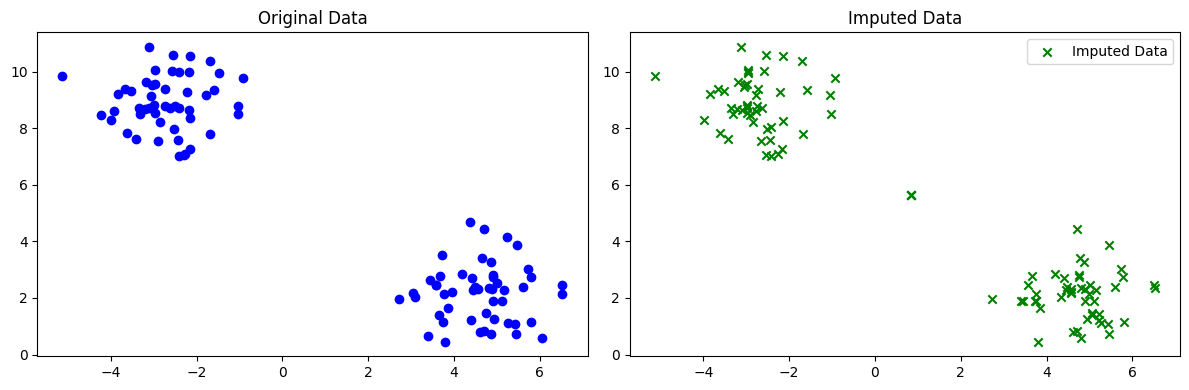


DataFrame with Missing Values Filled using Nearest Neighbor Imputation:
    Feature1  Feature2
0  -2.988372  8.828627
1   5.722930  3.026972
2  -3.053580  9.465630
3   5.461939  3.869963
4   4.867339  3.280312
..       ...       ...
95 -2.959218  9.945566
96 -1.593796  9.343037
97  3.793085  0.458322
98 -2.728870  9.371399
99 -2.983247  8.779699

[100 rows x 2 columns]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
from sklearn.datasets import make_blobs

# Create a synthetic dataset with missing values
X, _ = make_blobs(n_samples=100, centers=2, random_state=42)
X_with_missing = X.copy()
missing_mask = np.random.rand(X.shape[0], X.shape[1]) < 0.2  # Create missing data mask
X_with_missing[missing_mask] = np.nan

# Create a DataFrame from the synthetic dataset
df = pd.DataFrame(X_with_missing, columns=["Feature1", "Feature2"])

# Plot the original data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', label='Original Data')
plt.title('Original Data')

# Nearest Neighbor Imputation
imputer = KNNImputer(n_neighbors=5)
X_imputed = imputer.fit_transform(X_with_missing)

# Create a DataFrame from the imputed dataset
df_imputed = pd.DataFrame(X_imputed, columns=["Feature1", "Feature2"])

# Plot the imputed data
plt.subplot(1, 2, 2)
plt.scatter(X_imputed[:, 0], X_imputed[:, 1], c='green', marker='x', label='Imputed Data')
plt.title('Imputed Data')

plt.tight_layout()
plt.legend()
plt.show()

# Display the DataFrame with missing values filled using nearest neighbor imputation
print("\nDataFrame with Missing Values Filled using Nearest Neighbor Imputation:")
print(df_imputed)

**Explaination to key point in the above code :**

The line `np.random.rand(X.shape[0], X.shape[1]) < 0.2` generates a binary mask where elements are either `True` or `False`. Let's break down what this line does:

1. `X.shape[0]` returns the number of rows (samples) in the array `X`, and `X.shape[1]` returns the number of columns (features) in the array `X`. In your code, `X` represents your synthetic dataset.

2. `np.random.rand(X.shape[0], X.shape[1])` generates a random array of shape `(X.shape[0], X.shape[1])`. This array contains random values uniformly distributed between 0 and 1. Each element of this array corresponds to a random number.

3. `< 0.2` is a comparison operation that checks if each element in the random array is less than 0.2. It returns a Boolean array of the same shape as the random array, where each element is `True` if the corresponding element in the random array is less than 0.2, and `False` otherwise.

In the context of your code, this line is used to create a binary mask (`True` or `False`) where `True` values represent missing data points, and `False` values represent non-missing data points. The probability of an element being `True` (indicating a missing value) is 0.2, which means roughly 20% of the data points will be missing values based on this random mask. This mimics the introduction of missing values in your synthetic dataset for demonstration purposes.



#### Quick note about `make_blobs` function

The `make_blobs` function is a utility function provided by the scikit-learn library in Python. It is used to generate synthetic datasets for clustering and classification tasks. This function is often used for testing and prototyping machine learning algorithms when you need sample data with known properties.

Here's how the `make_blobs` function works:

1. **Data Generation:** It generates a specified number of clusters (blobs) of data points in a multi-dimensional space.

2. **Cluster Centers:** You can specify the centers of the clusters using the `centers` parameter. Each center represents a cluster's centroid.

3. **Cluster Standard Deviation:** The `cluster_std` parameter allows you to control the standard deviation of each cluster. It influences the spread of data points within each cluster.

4. **Data Distribution:** The function generates data points randomly around each cluster center, following a normal (Gaussian) distribution.

5. **Data Labels:** It assigns labels to the generated data points, indicating to which cluster each data point belongs. This is useful for supervised learning tasks or evaluating clustering algorithms.

Here's a simple example of how to use `make_blobs` to generate a synthetic dataset:

```python
from sklearn.datasets import make_blobs

# Generate a synthetic dataset with three clusters
X, y = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
```

In this example:

- `n_samples`: Specifies the total number of data points to generate.
- `centers`: Determines the number of clusters and their positions.
- `cluster_std`: Controls the spread of data points within each cluster.
- `random_state`: Sets the random seed for reproducibility.

After running this code, `X` will contain the generated data points, and `y` will contain the corresponding labels indicating the cluster membership of each data point.

`make_blobs` is a convenient tool for creating synthetic datasets for various machine learning tasks, such as clustering, classification, and visualization, when you need control over the data's characteristics.

---------

Connect with the author of this Notebook Rocky Jagtiani - [here](https://www.linkedin.com/in/rocky-jagtiani-3b390649/)

-------

## FAQ - How do I handle unclean data ?

Handling unclean data involves addressing various data quality issues, such as errors, inconsistencies, outliers, and noise, to prepare the data for meaningful analysis and modeling. Here are some common techniques and steps for handling unclean data:

1. **Data Cleaning:**
   - **Remove Duplicates:** Identify and remove duplicate records from the dataset using methods like `duplicated()` and `drop_duplicates()`.
   - **Handling Missing Values:** As you've learned before, fill or impute missing values using appropriate techniques.
   - **Outlier Detection and Treatment:** Identify and handle outliers that can distort analysis. You can use statistical methods or visualization techniques to spot outliers and decide whether to remove them or transform them.

2. **Data Transformation:**
   - **Normalization/Scaling:** Scale numerical features to have a consistent scale (e.g., using Min-Max scaling or Standardization) to ensure that no feature dominates the model's learning process.
   - **Encoding Categorical Data:** Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
   - **Feature Engineering:** Create new features or transform existing ones to capture relevant information or relationships in the data.

3. **Data Integration:**
   - **Combine Data Sources:** If working with multiple datasets, integrate them into a single dataset by matching and merging records based on common keys.

4. **Handling Inconsistent Data:**
   - **Data Type Conversion:** Ensure that data types are consistent and appropriate for the type of analysis you intend to perform.
   - **Addressing Data Entry Errors:** Correct or impute data entry errors, such as typos or inconsistent formatting.
   - **Standardization:** Standardize data values, such as dates or units of measurement, to ensure consistency.

5. **Handling Noisy Data:**
   - **Smoothing:** Apply smoothing techniques, such as moving averages, to reduce noise in time series data.
   - **Data Binning:** Aggregate data into bins or categories to reduce the impact of noisy data points.

6. **Data Validation and Verification:**
   - **Cross-Validation:** Use cross-validation techniques to assess the reliability of the data and the model's performance.
   - **Data Profiling:** Conduct data profiling to identify patterns and inconsistencies in the data.
   - **External Validation:** If possible, validate the data with external sources to ensure accuracy.

7. **Exploratory Data Analysis (EDA):**
   - Conduct thorough exploratory data analysis to visualize and understand data patterns, relationships, and potential issues.

8. **Documentation and Metadata:**
   - Maintain proper documentation and metadata to keep track of data sources, transformations, and any changes made to the dataset.

9. **Data Quality Frameworks:**
   - Consider using data quality frameworks and tools that can automate some aspects of data cleaning and provide data quality metrics.

10. **Domain Knowledge:**
    - Leverage domain knowledge to identify and address data issues that may not be apparent through automated methods.

11. **Iterative Process:**
    - Data cleaning and preparation are often iterative processes. You may need to revisit and refine these steps as you gain more insights from your analysis.

Handling unclean data is a critical part of the data preprocessing pipeline, and it directly impacts the quality and reliability of your machine learning models and data analysis results. The specific techniques and steps you need to take will depend on the nature of the data and the goals of your analysis.